<a href="https://colab.research.google.com/github/drsimonturega/student_simple_ml/blob/main/VM_KNN_ML_003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student_simple_ML
### Simple KNN classification model
### You need to be logged into your google acount to use this code
### There are three sections of code that need to be run in sequence;
- ### Lab book code for this experiemnt
- ### Upload inmput file
- ### Simple KNN with confussion matrix

In [1]:
# @title ## Lab book code for this experiemnt
# @markdown ### Enter the lab book code for this experiemnt
lab_book_code = 'VM_test' # @param {type:"string"}
import os
import shutil

os.chdir("/content")
try:
    os.mkdir(lab_book_code)
except FileExistsError:
    print(f'A folder for {lab_book_code} already exists you may over write your\
        data if you continue')
    #the lines below remove the folder! not currently implimented
    #os.chdir("..")
    #shutil.rmtree("lab_book_code")
!pwd
os.chdir(lab_book_code)
!pwd


/content
/content/VM_test


## Upload input file single file (*.csv lab data and classifier)

In [9]:
from google.colab import files
import numpy as np
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
print(type(uploaded.keys()))
spec_input = list(uploaded.keys())
spec_input = str(spec_input[0])

#spec_input = spec_input[:-4]
print(f'{spec_input}')
spec_inp= pd.DataFrame()
try:
    spec_inp = pd.read_csv(f'{spec_input}', encoding='unicode_escape')
except PermissionError:
    print('The file we are trying to open may be open in another \
                program, please close and try again!')
# we need some data cleaning
spec_inp.iloc[0:,0] = spec_inp.iloc[0:,0].str.lower()
spec_inp = spec_inp.fillna(0)
spec_inp.head()

Saving Fluor_VM_working_17072024.csv to Fluor_VM_working_17072024 (3).csv
User uploaded file "Fluor_VM_working_17072024 (3).csv" with length 45951 bytes
<class 'dict_keys'>
Fluor_VM_working_17072024 (3).csv


,Chem,519,521,523,525,527,529,531,533,535,...,703,705,707,709,711,713,715,717,719,721
0,rna,10395,11945,13587,15174,16623,17765,18866,19389,19817,...,1453,1485,1435,1564,1678,1698,1964,1925,2059,2149
1,rna,10296,11847,13508,15064,16598,17680,18686,19290,19753,...,1335,1420,1470,1449,1678,1698,1813,1925,2059,2149
2,rna,238,254,266,287,294,323,327,332,333,...,890,904,1015,1144,1216,1377,1612,1595,1816,1948
3,rna,6307,7223,8299,9304,10329,11047,11725,12188,12504,...,1275,1291,1400,1411,1468,1468,1763,1760,1938,2217
4,rna,6622,7737,8898,10036,11100,11993,12829,13387,13780,...,1335,1323,1435,1488,1552,1652,1713,1870,1998,2149


### Building KNN clasifcation model with scikitlearn

Accuracy train: 0.6973684210526315
Accuracy test: 0.45


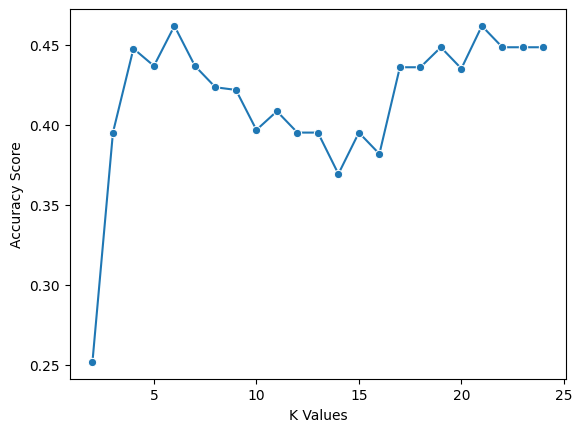

[0.25166666666666665, 0.3949999999999999, 0.44749999999999995, 0.4366666666666667, 0.4616666666666666, 0.43666666666666665, 0.42333333333333334, 0.4216666666666667, 0.39666666666666667, 0.4083333333333334, 0.3949999999999999, 0.395, 0.36916666666666664, 0.39499999999999996, 0.38166666666666665, 0.43583333333333324, 0.43583333333333335, 0.44833333333333336, 0.43500000000000005, 0.4616666666666667, 0.44833333333333336, 0.44833333333333336, 0.44833333333333336]
19
21
Accuracy: 0.6
Precision: 0.6
Recall: 0.5166666666666666
y_test ['rna' 'blank' 'protien' 'rna' 'rna' 'rna' 'protien' 'protien' 'rna' 'rna'
 'rna' 'rna' 'prorna' 'rna' 'rna' 'prorna' 'rna' 'rna' 'protien' 'protien']
y_pred ['rna' 'rna' 'protien' 'prorna' 'rna' 'rna' 'prorna' 'prorna' 'rna' 'rna'
 'prorna' 'rna' 'prorna' 'rna' 'protien' 'prorna' 'rna' 'prorna' 'prorna'
 'protien']
[[0 1 0 0]
 [0 8 0 3]
 [0 0 0 0]
 [0 0 0 2]]


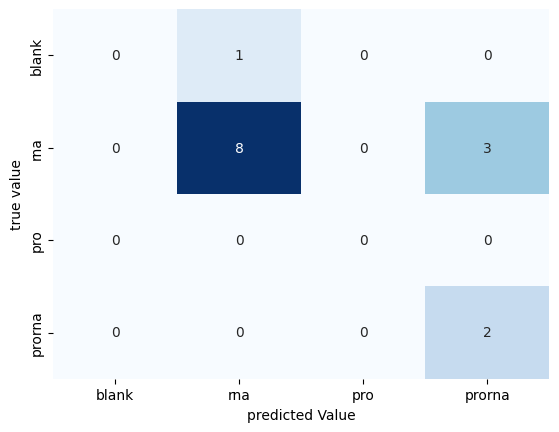

In [11]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt

# Splitting into scores(y) and disciptors (x)
spec_dat = spec_inp
# uses sklearn to normalise the spectral part of the df then do ML prep
#pandas DataFrame into a NumPy array
X = spec_dat.drop("Chem", axis=1)
X = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)
X = X.values
y = spec_dat["Chem"]
y = y.values

# Splitting data into test and training setting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=15354)
# Building KNN classification model with scikitlearn
# Fitting a kNN classification
# Fitting a kNN classification

# setting up model!
knn_c_model = KNeighborsClassifier(n_neighbors=3)

#running model
knn_c_model.fit(X_train, y_train)

# calculating rmse on training set
from sklearn.metrics import accuracy_score
from math import sqrt
train_c_preds = knn_c_model.predict(X_train)
test_c_preds = knn_c_model.predict(X_test)
train_accuracy = accuracy_score(y_train, train_c_preds)
test_accuracy = accuracy_score(y_test, test_c_preds)
print("Accuracy train:", train_accuracy)
print("Accuracy test:", test_accuracy)

# Using Cross Validation to Get the Best Value of k
k_values = [i for i in range (2,25)]
scores = []

#scaler = StandardScaler()
#X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))
opt_plo = sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.show(opt_plo, True)

# train our model using the best k value
#best_index = [x for x in best_index if str(x) != 'nan']
best_index = np.argmax(scores)
print(scores)
print(best_index)
best_k = k_values[best_index]
print(best_k)
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
# need to think about precision and acuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')#needs some thought
recall = recall_score(y_test, y_pred, average='macro')#needs some thought

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Confusion matrix labels are really useful
confusion_matrix=confusion_matrix(y_test,y_pred, labels=["blank","rna","pro","prorna"])
# three diagnostic print statmanets
print(f'y_test {y_test}')
print(f'y_pred {y_pred}')
print(f'{confusion_matrix}')
con_mat = sns.heatmap(confusion_matrix,cmap='Blues',cbar=False, annot=True)
plt.xticks(np.arange(4)+0.5,["blank","rna","pro","prorna"])
plt.yticks(np.arange(4)+0.5,["blank","rna","pro","prorna"])
plt.xlabel("predicted Value")
plt.ylabel("true value")
plt.show(con_mat, True)